<p><font size="6"><b>01 - Pandas: Data Structures </b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2020*


---

In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Let's directly start with importing some data: the `titanic` dataset about the passengers of the Titanic and their survival:

In [4]:
df = pd.read_csv("Titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading such a tabular dataset, Pandas provides the functionalities to answer questions about this data in a few lines of code. Let's start with a few examples as illustration:

<div class="alert alert-warning">

 <ul>
  <li>What is the age distribution of the passengers?</li>
</ul> 

</div>

In [7]:
#df["Age"]

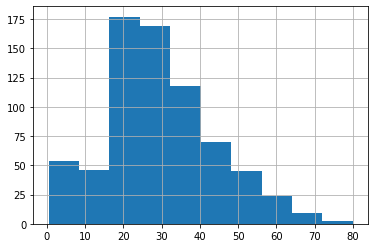

In [8]:
df['Age'].hist()

<div class="alert alert-warning">

 <ul>
  <li>How does the survival rate of the passengers differ between sexes?</li>
</ul> 

</div>

In [10]:
df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
df["Survived"].mean() #### Nombre de personne ayant survécue 

0.3838383838383838

In [12]:
df.groupby("Sex")[["Survived"]].mean() *100 ### taux de surives des individues sur le bateaux en fonction du genre

,Survived
Sex,
female,74.203822
male,18.890815


In [ ]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

<div class="alert alert-warning">

 <ul>
  <li>Or how does the survival rate differ between the different classes of the Titanic?</li>
</ul> 

</div>

In [ ]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

<div class="alert alert-warning">

 <ul>
  <li>Are young people (e.g. < 25 years) likely to survive?</li>
</ul> 

</div>

In [16]:
df[df["Age"] < 25 ] #### 278 personnes qui ont moins de 25ans

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [19]:
df_25 = df[df["Age"] < 25] #### Ensemble des personnes qui ont moins de 25 ans

In [22]:
df_25["Survived"].mean()*100  #### taux de survies des personnes qui ont moins de 25 ans

42.44604316546763

* Taux de survie de **42.44%**

? Les femmes et les enfants d'abords est vérifiée ?

In [26]:
#### Individu moins de 18 ans

df_18 = df[df["Age"] < 18]

df_18["Survived"].mean()

0.5398230088495575

* Taux de survie de **53.98%** ie 1 / 2 chances de survie

In [36]:
#### Individu de moins de 15 ans


df_15 = df[df["Age"] < 15]
df_15["Survived"].mean()

0.5769230769230769

* Taux de survie de **57.69%** ie plus d'une 1 / 2 chances de survie

In [29]:
#df_18

##### Déterminer le taux de survie en fonction de la classe sur le bateau

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
df["Pclass"] #### Ensemble des classes sur le bateaux

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [34]:
df.groupby("Pclass")[["Survived"]].mean() *100 #### Taux de survie par classe

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


* Emplacement détermine le taux de survie des individus
* Taux de survie en classe 1 de **62.96 %**

In [93]:
df.groupby(["Pclass", "Sex"])[["Survived"]].mean() *100 #### Taux de survie par classe

Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

In [ ]:
df['Survived'].sum() / df['Survived'].count()

In [ ]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

All the needed functionality for the above examples will be explained throughout the course, but as a start: the data types to work with.

# Data structures

Pandas provides two fundamental data objects, for 1D (``Series``) and 2D data (``DataFrame``).

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [38]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [39]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [40]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [44]:
s[0] #### Premier élement de la série

0.1

In [45]:
s[2]

0.3

Unlike the NumPy array, though, this index can be something other than integers:

In [53]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [49]:
s2["a"]

0

In [50]:
s2['c']

2

### Pandas Series versus dictionaries

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [54]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

We can index the populations like a dict as expected:

In [55]:
population['France']

64.3

In [56]:
population["Netherlands"]

16.9

but with the power of numpy arrays:

In [57]:
population * 1000000

Germany           81300000.0
Belgium           11300000.0
France            64300000.0
United Kingdom    64900000.0
Netherlands       16900000.0
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img src="../img/schema-dataframe.svg" width=50%>

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [58]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [59]:
countries.index ### Acceder au index

RangeIndex(start=0, stop=5, step=1)

In [62]:
countries.columns #### Acces aux colonnes du df

Index(['country', 'population', 'area', 'capital'], dtype='object')

To check the data types of the different columns:

In [61]:
countries.dtypes #### Types object : str ie du texte

country        object
population    float64
area            int64
capital        object
dtype: object

An overview of that information can be given with the `info()` method:

In [63]:
countries.info() #### Information sur le dataset (structure et les types de données)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   population  5 non-null      float64
 2   area        5 non-null      int64  
 3   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [65]:
countries.values #### Valeurs du dataframe

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

To access a Series representing a column in the data, use typical indexing syntax:

In [66]:
countries['area']

0     30510
1    671308
2    357050
3     41526
4    244820
Name: area, dtype: int64

In [67]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [69]:
countries["capital"] #### Acceder au données de la variable capital

0     Brussels
1        Paris
2       Berlin
3    Amsterdam
4       London
Name: capital, dtype: object

In [70]:
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Changing the DataFrame index

If we don't like what the index looks like, we can reset it and set one of our columns:

In [71]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [75]:
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [81]:
countries.set_index('country', inplace = True)  #### Ajout d'inplace = True : sauvegarde en mémoire le changement

In [82]:
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


Reversing this operation, is `reset_index`:

In [78]:
countries = countries.reset_index('country')
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [77]:
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


## Some useful methods on these data structures

Exploration of the Series and DataFrame is essential (check out what you're dealing with). 

In [83]:
countries.head() # Top rows

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [84]:
countries.tail() # Bottom rows

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [86]:
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [87]:
countries.describe()  #### Analyse statistique des variables quantitatives

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


In [88]:
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


**Sort**ing your data **by** a specific column is another important first-check:

In [94]:
countries.sort_values(by='capital')  #### Trier les individus par ordre croissant

,population,area,capital
country,,,
Netherlands,16.9,41526,Amsterdam
Germany,81.3,357050,Berlin
Belgium,11.3,30510,Brussels
United Kingdom,64.9,244820,London
France,64.3,671308,Paris


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Check the help of the `sort_values` function and find out how to sort from the largest values to the lowest values</li>
    </ul>
</div>

In [96]:
countries.sort_values??


The **`plot`** method can be used to quickly visualize the data in different ways:

In [ ]:
countries.plot()

However, for this dataset, it does not say that much:

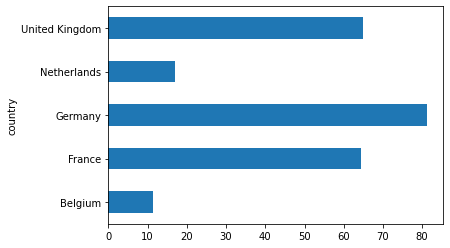

In [97]:
countries['population'].plot(kind='barh')

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>You can play with the `kind` keyword of the `plot` function in the figure above: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'</li>
    </ul>
</div>

# Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [ ]:
# pd.read_

In [ ]:
# states.to_